<h1> Geometric Operations and Other Mathematical Tools</h1>


Estimated time needed: **40** minutes


<h2>Objectives</h2>


In the first part of the lab, you will apply geometric transformations to an image. This allows you to perform different operations like reshape translation, i.e. to shift, reshape and rotate the image. In the second part of the lab, you will learn how to apply some basic array and matrix operations to the image. 


<ul>
    <li><a href='#PT'> Geometric Operations  </a>
        <ul>
            <li>Scaling</li>
            <li>Translation</li>
            <li>Rotation</li>   
          </ul>
        <li><a href='#PT'>  Mathematical Operations   </a>
        <ul>
            <li>Array Operations  </li>
            <li>Matix Operations n</li> 
          </ul>


</ul>


----


Download the image for the lab:


In [98]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png -O lenna.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png -O baboon.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/barbara.png -O barbara.png  

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


We will be using the following imported functions in this lab:


In [99]:
import matplotlib.pyplot as plt   # Thư viện vẽ biểu đồ và hiển thị hình ảnh
from PIL import Image             # Thư viện xử lý ảnh (mở, lưu, chỉnh sửa ảnh)
import numpy as np                # Thư viện tính toán số học, làm việc với mảng (array)


First, let's define a helper function to plot two images side-by-side. You will not need to understand this code this moment, but this function will be used repeatedly in this tutorial to showcase the results. 


In [100]:
def plot_image(image_1, image_2, title_1="Orignal", title_2="New Image"):
    plt.figure(figsize=(10,10))      # Tạo khung hình với kích thước 10x10 inch

    plt.subplot(1, 2, 1)             # Chia khung hình thành 1 hàng, 2 cột, chọn ô thứ 1
    plt.imshow(image_1, cmap="gray") # Hiển thị ảnh 1 dưới dạng ảnh xám
    plt.title(title_1)               # Đặt tiêu đề cho ảnh 1

    plt.subplot(1, 2, 2)             # Chọn ô thứ 2 trong khung hình
    plt.imshow(image_2, cmap="gray") # Hiển thị ảnh 2 dưới dạng ảnh xám
    plt.title(title_2)               # Đặt tiêu đề cho ảnh 2

    plt.show()                       # Hiển thị toàn bộ hình ra màn hình


#  Geometric Transformations


 Geometric transformations allow you to perform different operations like translation, i.e. to shift, reshape and rotate the image.


We can resize an image using the method  <code>resize()</code> of <code>PIL</code> images, which takes the resized image's <code>width</code> and <code>height</code> as paramters. 

Consider the following image:


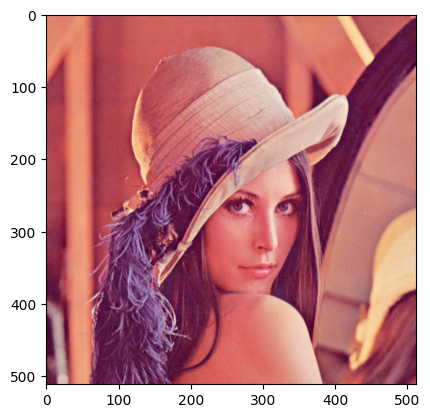

In [101]:
image = Image.open("lenna.png")   # Mở file ảnh lenna.png và lưu vào biến image

plt.imshow(image)                # Hiển thị ảnh lên màn hình
plt.show()                       # Vẽ và hiển thị ảnh


We can scale the horizontal axis by two and leave the vertical axis as is:


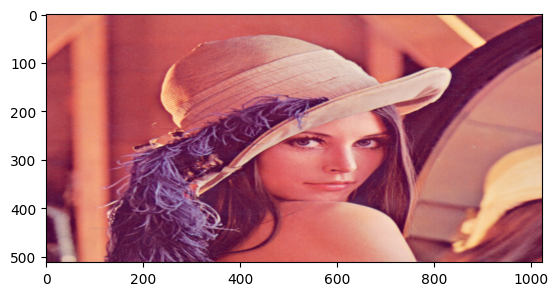

In [102]:
width, height = image.size          # Lấy chiều rộng và chiều cao của ảnh gốc

new_width = 2 * width               # Tăng gấp đôi chiều rộng ảnh
new_hight = height                  # Giữ nguyên chiều cao ảnh

new_image = image.resize((new_width, new_hight))  # Resize ảnh theo kích thước mới

plt.imshow(new_image)               # Hiển thị ảnh sau khi resize
plt.show()                          # Hiện ảnh ra màn hình


In the same manner, we can scale the vertical axis by two:


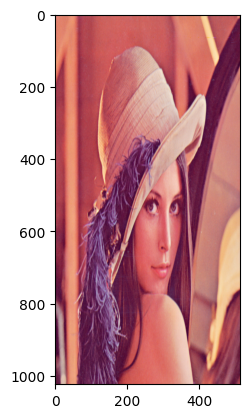

In [103]:
new_width = width                  # Giữ nguyên chiều rộng ảnh
new_hight = 2 * height             # Tăng gấp đôi chiều cao ảnh

new_image = image.resize((new_width, new_hight))  # Resize ảnh theo kích thước mới

plt.imshow(new_image)              # Hiển thị ảnh sau khi resize
plt.show()                         # Hiện ảnh ra màn hình


We can double both the width and the height of the image:


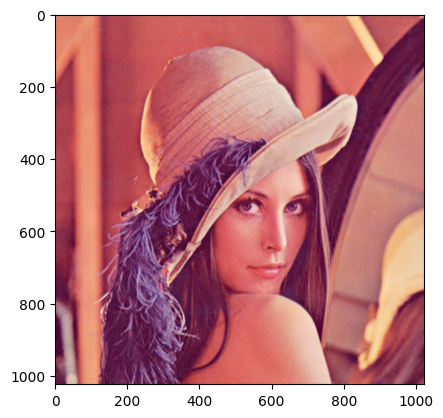

In [104]:
new_width = 2 * width               # Tăng gấp đôi chiều rộng ảnh
new_hight = 2 * height              # Tăng gấp đôi chiều cao ảnh

new_image = image.resize((new_width, new_hight))  # Resize ảnh theo kích thước mới

plt.imshow(new_image)               # Hiển thị ảnh sau khi phóng to
plt.show()                          # Hiện ảnh ra màn hình


We can also shrink the image's width and height both by 1/2:


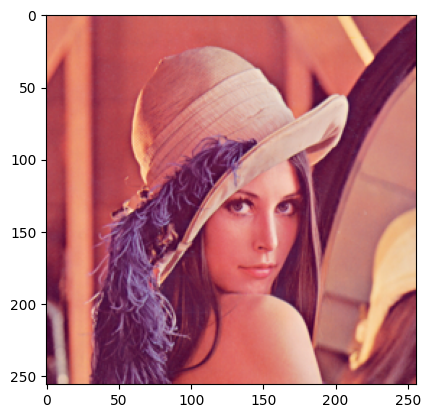

In [105]:
new_width = width // 2              # Giảm chiều rộng ảnh còn một nửa
new_hight = height // 2             # Giảm chiều cao ảnh còn một nửa

new_image = image.resize((new_width, new_hight))  # Resize ảnh theo kích thước mới

plt.imshow(new_image)               # Hiển thị ảnh sau khi thu nhỏ
plt.show()                          # Hiện ảnh ra màn hình


## Rotation 


We can rotate an image by angle $\theta$, using the method `rotate`.


We can rotate our toy image by 45 degrees:


In [106]:
theta = 45                         # Góc xoay ảnh 45 độ
new_image = image.rotate(theta)    # Xoay ảnh ngược chiều kim đồng hồ 45 độ


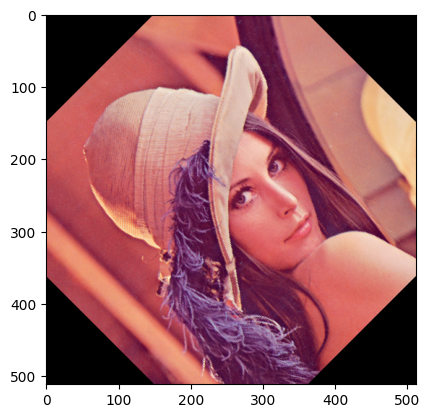

In [107]:
plt.imshow(new_image)   # Hiển thị ảnh new_image lên màn hình
plt.show()              # Vẽ và hiển thị ảnh ra màn hình


# Mathematical Operations 


## Array Operations 


We can perform array operations on an image; Using Python broadcasting, we can add a constant to each pixel's intensity value. 

Before doing that, we must first we convert the PIL image to a numpy array.


In [108]:
image = np.array(image)   # Chuyển ảnh từ định dạng PIL sang mảng NumPy


We can then add the constant to the image array:


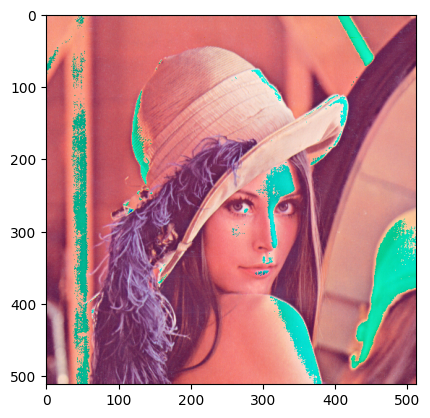

In [109]:
new_image = image + 20    # Tăng giá trị mỗi pixel lên 20 → ảnh sáng hơn
plt.imshow(new_image)    # Hiển thị ảnh sau khi tăng độ sáng
plt.show()               # Hiện ảnh ra màn hình


We can also multiply every pixel's intensity value by a constant value.


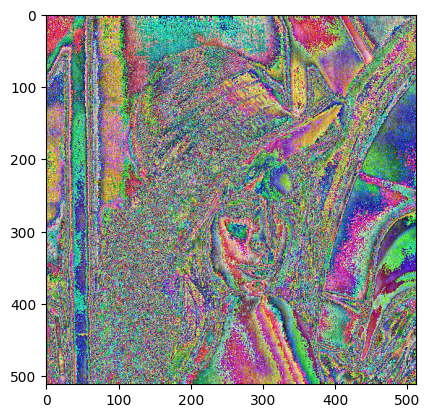

In [110]:
new_image = 10 * image   # Nhân giá trị mỗi pixel lên 10 → ảnh sáng mạnh
plt.imshow(new_image)   # Hiển thị ảnh sau khi thay đổi độ sáng
plt.show()              # Hiện ảnh ra màn hình


We can add the elements of two arrays of equal shape. In this example, we generate an array of random noises with the same shape and data type as our image.


In [111]:
Noise = np.random.normal(0, 20, (height, width, 3)).astype(np.uint8)
# Tạo nhiễu Gaussian (chuẩn) với:
# - Trung bình = 0
# - Độ lệch chuẩn = 20
# - Kích thước (height, width, 3) tương ứng ảnh màu RGB
# - Ép kiểu sang uint8 để giống giá trị pixel ảnh (0–255)

Noise.shape                     # Kiểm tra kích thước của ma trận nhiễu


(512, 512, 3)

We add the generated noise to the image and plot the result. We see the values that have corrupted the image:


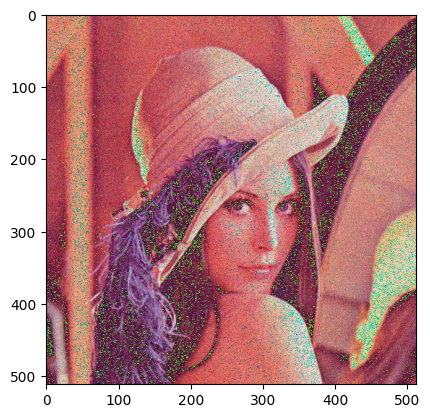

In [112]:
new_image = image + Noise    # Cộng nhiễu vào từng pixel của ảnh → tạo ảnh bị nhiễu

plt.imshow(new_image)        # Hiển thị ảnh sau khi thêm nhiễu
plt.show()                   # Hiện ảnh ra màn hình


At the same time, we can multiply the elements of two arrays of equal shape. We can multiply the random image and the Lenna image and plot the result. 


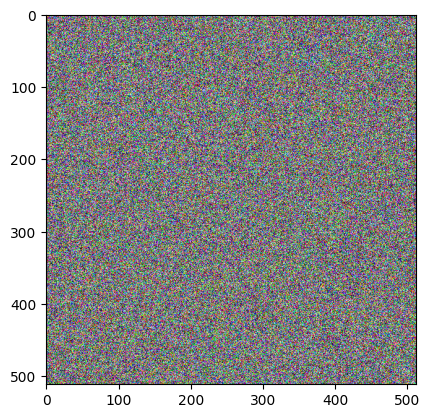

In [113]:
new_image = image * Noise    # Nhân từng pixel của ảnh với nhiễu → làm ảnh biến dạng mạnh

plt.imshow(new_image)        # Hiển thị ảnh sau khi nhân nhiễu
plt.show()                   # Hiện ảnh ra màn hình


## Matrix Operations 


Grayscale images are matrices. Consider the following grayscale image:


In [114]:
im_gray = Image.open("barbara.png")   # Mở file ảnh barbara.png và lưu vào biến im_gray


Even though the image is gray, it has three channels; we can convert it to a one-channel image.


In [115]:
from PIL import ImageOps    # Thư viện hỗ trợ các phép xử lý ảnh cơ bản (đảo màu, chuyển xám, cân bằng ảnh…)


In [116]:
im_gray = ImageOps.grayscale(im_gray)   # Chuyển ảnh sang ảnh xám (1 kênh)


We can convert the PIL image to a numpy array:


In [117]:
im_gray = np.array(im_gray)   # Chuyển ảnh xám từ PIL sang mảng NumPy


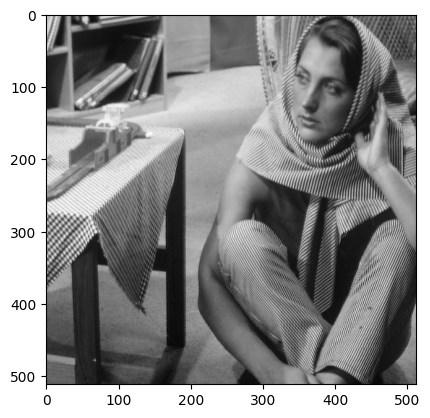

In [118]:
plt.imshow(im_gray, cmap='gray')   # Hiển thị ảnh xám với thang màu gray
plt.show()                         # Hiển thị ảnh ra màn hình


We can apply algorithms designed for matrices.  We can use  Singular Value Decomposition, decomposing our image matrix into  a product of three matrices.


In [119]:
U, s, V = np.linalg.svd(im_gray , full_matrices=True) #Thực hiện phân rã SVD cho ảnh xám: im_gray ≈ U · S · V

We see <code>s</code> is not rectangular:


In [120]:
s.shape    # Trả về kích thước của vector  

(512,)

We can convert  <code>s</code> to a diagonal matrix <code>S</code>:


In [121]:
S = np.zeros((im_gray.shape[0], im_gray.shape[1]))
S[:image.shape[0], :image.shape[0]] = np.diag(s)

We can plot the matrix U and V:


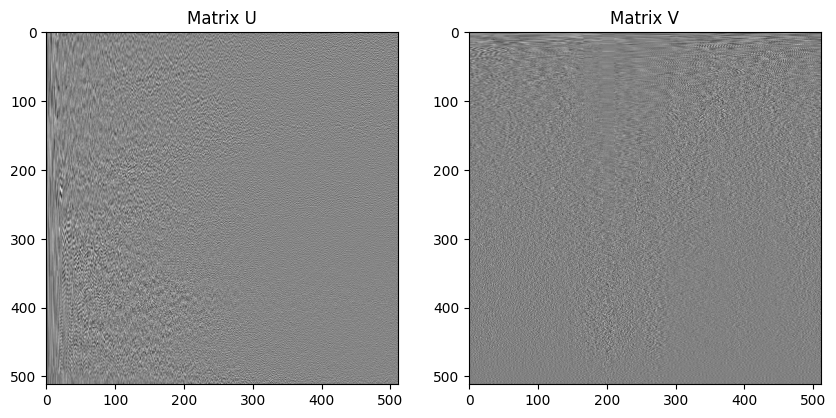

In [122]:
plot_image(U, V, title_1="Matrix U", title_2="Matrix V")
# Hiển thị hai ma trận U và V của phân rã SVD để quan sát cấu trúc


We see most of the elements in S are zero:


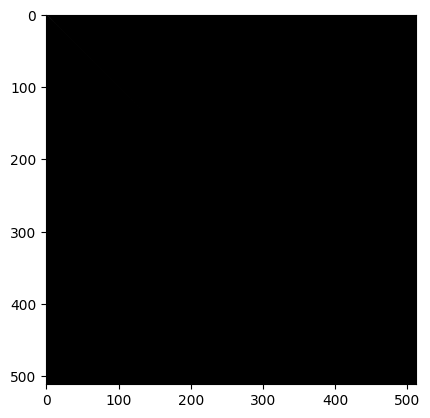

In [123]:
plt.imshow(S, cmap='gray')   # Hiển thị ma trận S (ma trận đường chéo chứa giá trị suy biến)
plt.show()                   # Hiển thị ảnh ra màn hình


We can find the matrix product of all the  matrices. First, we can perform matrix multiplication on S and U and assign it to `B` and plot the results: 


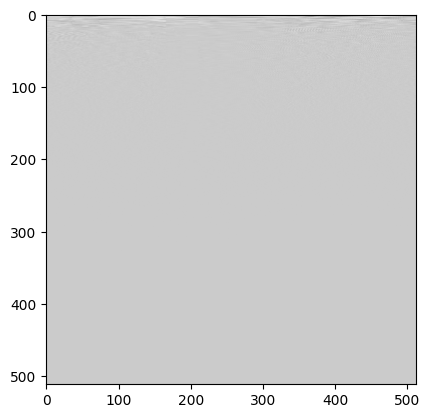

In [124]:
B = S.dot(V)                 # Nhân ma trận S với V để tạo ma trận trung gian B
plt.imshow(B, cmap='gray')   # Hiển thị ma trận B dưới dạng ảnh xám
plt.show()                   # Hiển thị ảnh ra màn hình


We can find the matrix product of `U`, `S`, and `B`. We see it's the entire image:


In [125]:
A = U.dot(B)    # Nhân ma trận U với B để tái tạo lại ảnh từ phân rã SVD


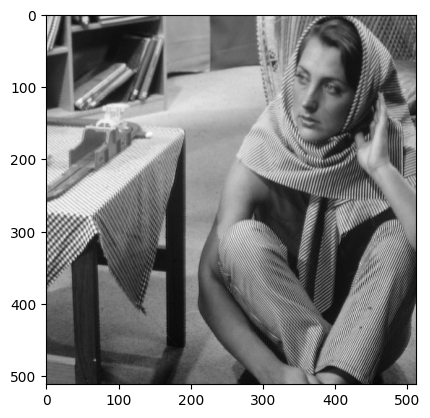

In [126]:
plt.imshow(A, cmap='gray')   # Hiển thị ảnh A (ảnh được tái tạo từ SVD) dưới dạng ảnh xám
plt.show()                   # Hiển thị ảnh ra màn hình


It turns out that many elements are redundant. We can eliminate some rows and columns of S and V and approximate the image by finding the product:


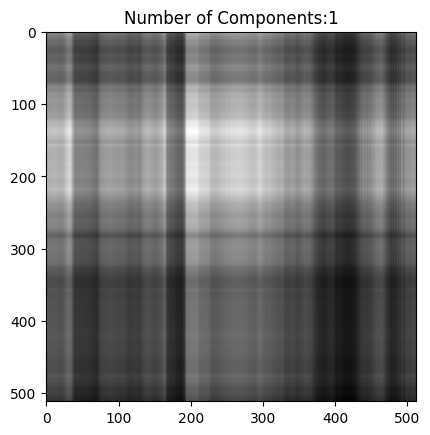

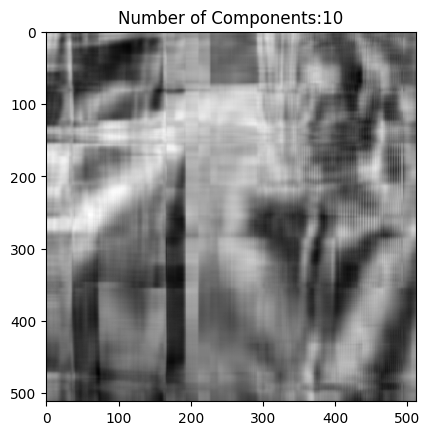

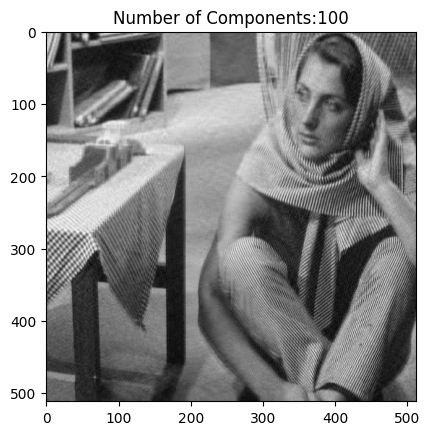

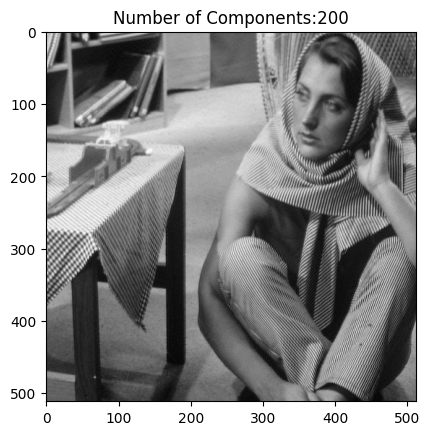

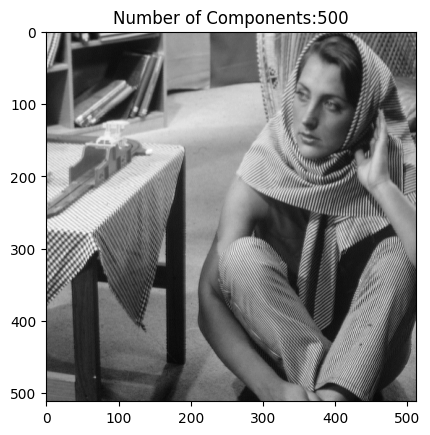

In [128]:
for n_component in [1, 10, 100, 200, 500]:     # Duyệt qua các số lượng thành phần SVD khác nhau
    S_new = S[:, :n_component]                # Lấy n_component cột đầu của ma trận S
    V_new = V[:n_component, :]                # Lấy n_component hàng đầu của ma trận V
    A = U.dot(S_new.dot(V_new))               # Tái tạo ảnh xấp xỉ từ U · S_new · V_new
    plt.imshow(A, cmap='gray')                # Hiển thị ảnh tái tạo
    plt.title("Number of Components:" + str(n_component))  # Hiển thị số thành phần dùng
    plt.show()                                # Hiện ảnh ra màn hình


We see we only need 100 to 200 Components to represent the image.


# References 


[1]  Images were taken from: https://homepages.cae.wisc.edu/~ece533/images/
    
[2]  <a href='https://pillow.readthedocs.io/en/stable/index.html'>Pillow Docs</a>

[3]  <a href='https://opencv.org/'>Open CV</a>

[4] Gonzalez, Rafael C., and Richard E. Woods. "Digital image processing." (2017).

[5 ] Jian, Wushuai, Xueyan Sun, and Shuqian Luo. "Computer-aided diagnosis of breast microcalcifications based on dual-tree complex wavelet transform." Biomedical engineering online 11.1 (2012): 1-12.


<!--<h2>Change Log</h2>-->


<!--<table>
    <tr>
        <th>Date (YYYY-MM-DD)</th>
        <th>Version</th>
        <th>Changed By</th>
        <th>Change Description</th>
    </tr>
    <tr>
        <td>2020-07-20</td>
        <td>0.2</td>
        <td>Azim</td>
        <td>Modified Multiple Areas</td>
    </tr>
    <tr>
        <td>2020-07-17</td>
        <td>0.1</td>
        <td>Azim</td>
        <td>Created Lab Template</td>
    </tr>
</table>
-->


<h3 align="center"> &#169; IBM Corporation. All rights reserved. <h3/>
